<a href="https://colab.research.google.com/github/Biswajit-Maharana/Numerical-Assignment-1/blob/main/Num_Analysis_Asgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name- Biswajit Maharana
#Roll No-23224003(PhD 1st Sem)
#1.Fixed point Iteration
import math
def fixed_point_iteration(initial_guess, tolerance=1e-4, max_iterations=100):
    def func(x):
        return math.exp(-x) - x
    x = initial_guess
    iteration = 0
    while abs(func(x)) > tolerance and iteration < max_iterations:
        x = math.exp(-x)
        iteration += 1
    if abs(func(x)) <= tolerance:
        return round(x, 4), iteration
    else:
        return None
initial_guess = 0.5
result = fixed_point_iteration(initial_guess)

if result:
    root, iterations = result
    print(f"Root: {root}, Iterations: {iterations}")
else:
    print("Method did not converge within the specified iterations.")

Root: 0.5672, Iterations: 13


In [ ]:
#2. Simpson and Gauss Quadrature
from scipy import integrate
import numpy as np
def integrand(x):
    return np.sqrt(1 + x**4)
# Simpson's Rule
def simpsons_rule(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    result = h / 3 * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])
    return result
# Gaussian Quadrature
def gaussian_quadrature(func, a, b, n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    x_values = 0.5 * (b - a) * nodes + 0.5 * (b + a)
    y_values = func(x_values)
    result = 0.5 * (b - a) * sum(weights * y_values)
    return result
a = 0
b = 1
n_simpsons = 1000
n_gaussian = 5
result_simpsons = simpsons_rule(integrand, a, b, n_simpsons)
result_gaussian = gaussian_quadrature(integrand, a, b, n_gaussian)
print(f"Simpson's Rule result: {result_simpsons:.6f}")
print(f"Gaussian Quadrature result: {result_gaussian:.6f}")

Simpson's Rule result: 1.089429
Gaussian Quadrature result: 1.089430


In [ ]:
#3.RK4
import numpy as np
def ode_function(x, y):
    return (5 * x**2 - y) / np.exp(x + y)
def runge_kutta_4th_order(h, x, y):
    k1 = h * ode_function(x, y)
    k2 = h * ode_function(x + 0.5 * h, y + 0.5 * k1)
    k3 = h * ode_function(x + 0.5 * h, y + 0.5 * k2)
    k4 = h * ode_function(x + h, y + k3)
    y_next = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y_next
x0 = 0
y0 = 1.0
interval_sizes = [0.5, 0.2, 0.05, 0.01]
for h in interval_sizes:
    x_values = np.arange(x0, 1.0 + h, h)
    y_values = []
    x_current = x0
    y_current = y0
    for x in x_values:
        y_values.append(y_current)
        y_current = runge_kutta_4th_order(h, x_current, y_current)
        x_current = x
# Display results in tabular form
    print(f"\nResults for interval size h = {h}:\n")
    print(f"{'x':<10}{'y':<20}")
    print("-" * 30)
    for x, y in zip(x_values, y_values):
        print(f"{x:<10.2f}{y:<20.6f}")


Results for interval size h = 0.5:

x         y                   
------------------------------
0.00      1.000000            
0.50      0.913193            
1.00      0.832794            

Results for interval size h = 0.2:

x         y                   
------------------------------
0.00      1.000000            
0.20      0.937797            
0.40      0.876159            
0.60      0.850902            
0.80      0.871100            
1.00      0.933452            

Results for interval size h = 0.05:

x         y                   
------------------------------
0.00      1.000000            
0.05      0.982134            
0.10      0.964275            
0.15      0.947744            
0.20      0.932902            
0.25      0.920061            
0.30      0.909489            
0.35      0.901400            
0.40      0.895958            
0.45      0.893275            
0.50      0.893411            
0.55      0.896379            
0.60      0.902144            
0.65      0.910634  

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Time t \ Position x 0.00 0.20 0.40 0.60 0.80 1.00 1.20 1.40 1.60 1.80 2.00 2.20 2.40 2.60 2.80 3.00 3.20 3.40 3.60 3.80 4.00 4.20 4.40 4.60 4.80 5.00 5.20 5.40 5.60 5.80 6.00 6.20 6.40 6.60 6.80 7.00 7.20 7.40 7.60 7.80 8.00 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.00 0.0000 0.7800 1.5200 2.2200 2.8800 3.5000 4.0800 4.6200 5.1200 5.5800 6.0000 6.3800 6.7200 7.0200 7.2800 7.5000 7.6800 7.8200 7.9200 7.9800 8.0000 7.9800 7.9200 7.8200 7.6800 7.5000 7.2800 7.0200 6.7200 6.3800 6.0000 5.5800 5.1200 4.6200 4.0800 3.5000 2.8800 2.2200 1.5200 0.7800 0.0000 
0.01 0.2648 0.8089 1.5084 2.2014 2.8602 3.4800 4.0600 4.6000 5.1000 5.5600 5.9800 6.3600 6.7000 7.0000 7.2600 7.4800 7.6600 7.8000 7.900

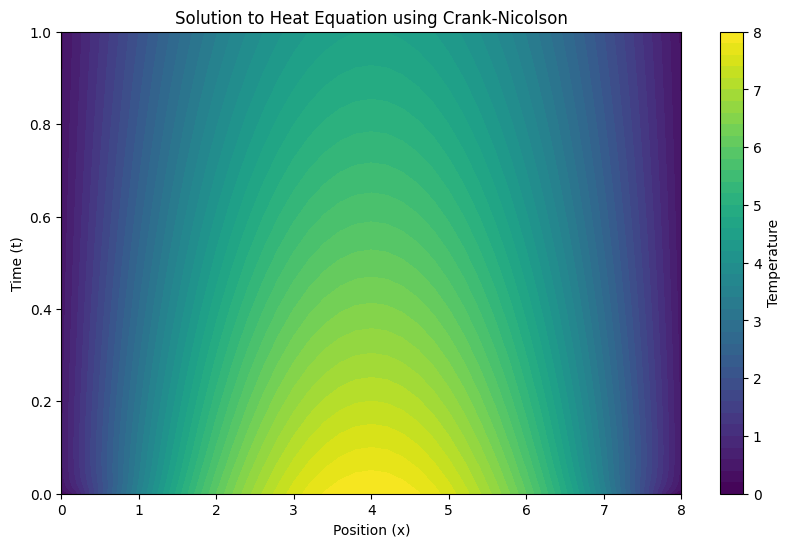

In [ ]:
#4.Crank-Nicolson
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, identity
from scipy.sparse.linalg import spsolve

def crank_nicolson_heat_equation(L, T, Nx, Nt, alpha=0.5):
    dx = L / Nx
    dt = T / Nt
    x_values = np.linspace(0, L, Nx+1)
    t_values = np.linspace(0, T, Nt+1)
    u = np.zeros((Nx+1, Nt+1))
    u[:, 0] = 4 * x_values - 0.5 * x_values**2
    main_diag = np.ones(Nx+1) * (1 + alpha)
    off_diag = np.ones(Nx) * (-alpha / 2)
    A = diags([off_diag, main_diag, off_diag], [-1, 0, 1], shape=(Nx+1, Nx+1))
    B = diags([-off_diag, 1 - alpha, -off_diag], [-1, 0, 1], shape=(Nx+1, Nx+1))
    for n in range(1, Nt+1):
        b = B @ u[:, n-1]
        u[:, n] = spsolve(A, b)
    return x_values, t_values, u
def display_solution(x_values, t_values, u):
# Display the solution in a table
    print("Time t \\ Position x ", end="")
    for x in x_values:
        print(f"{x:.2f} ", end="")
    print("\n" + "-" * (len(x_values) * 8 + 16))

    for i, t in enumerate(t_values):
        print(f"{t:.2f} ", end="")
        for j, x in enumerate(x_values):
            print(f"{u[j, i]:.4f} ", end="")
        print()
# Display the solution in a contour plot
    plt.figure(figsize=(10, 6))
    plt.contourf(x_values, t_values, u.T, cmap='viridis', levels=50)
    plt.colorbar(label='Temperature')
    plt.title('Solution to Heat Equation using Crank-Nicolson')
    plt.xlabel('Position (x)')
    plt.ylabel('Time (t)')
    plt.show()
# Parameters
L = 8.0
T = 1.0
Nx = 40  # Number of spatial nodes
Nt = 200  # Number of temporal nodes
# Solve and display the solution
x_values, t_values, u = crank_nicolson_heat_equation(L, T, Nx, Nt, alpha=0.5)
display_solution(x_values, t_values, u)

#4. Value of alpha:-The stability parameter alpha is chosen based on the stability criterion for the Crank-Nicolson method.The choice of the stability parameter alpha is crucial for numerical stability. It should be chosen based on stability criteria, and a value around 0.5 is often a good starting point.

Solution in a table:
[[0.         0.         0.         0.         0.         0.        ]
 [0.4        0.45059732 0.50855221 0.59429515 0.75288481 1.08731273]
 [0.8        0.93292197 1.08479316 1.29066698 1.61480058 2.17462546]
 [1.2        1.43538227 1.70250827 2.04370242 2.52589432 3.26193819]
 [1.6        1.94518373 2.34163203 2.8306635  3.46800534 4.34925093]
 [2.         2.44280552 2.9836494  3.6442376  4.45108186 5.43656366]]


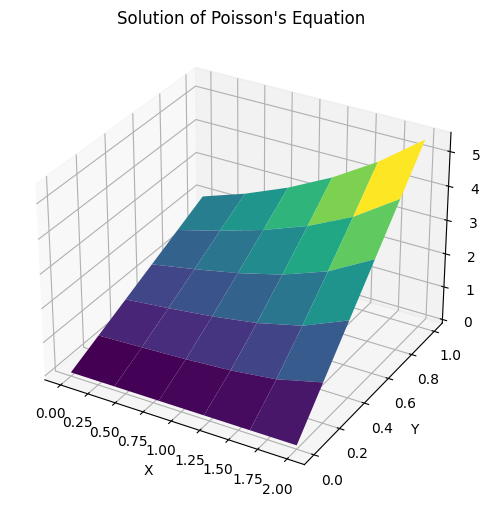

In [ ]:
#5.Poissons Equation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
Nx, Ny = 6, 6
Lx, Ly = 2.0, 1.0
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)
x_values = np.linspace(0, Lx, Nx)
y_values = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x_values, y_values)
u = np.zeros((Nx, Ny))
u[:, 0] = x_values  # u(x, 0) = x
u[:, -1] = x_values * np.exp(1)  # u(x, 1) = xe
u[0, :] = 0  # u(0, y) = 0
u[-1, :] = 2 * np.exp(y_values)  # u(2, y) = 2e^y
# Solve Poisson's equation using Finite Difference Method
for _ in range(1000):
    u[1:-1, 1:-1] = 0.25 * (u[2:, 1:-1] + u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, :-2] - dx * dy * x_values[1:-1] * np.exp(y_values[1:-1]))
print("Solution in a table:")
print(u)
# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.set_title('Solution of Poisson\'s Equation')
plt.show()
